## Task g

Frederik Rogge, Mouhammad Abu Rasheed and Homa Priya Tarigopula

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import numpy as np                                                                          
np.random.seed(100)


from models import *
from utils import *
from optimizers import *

In [2]:
def design_matrix(x_train, x_test):
    #now scale the data
    scaler = StandardScaler()
    scaler.fit(x_train)
    X_train_scaled = scaler.transform(x_train)
    X_test_scaled = scaler.transform(x_test)
    return X_train_scaled , X_test_scaled

# Part g) Logistic Regression code (Wisconsin)

###  SGD Implementation from lecture notes

Test Accuracy : 
 [[0.39894426 0.51985717 0.495746   0.33892253]
 [0.74530352 0.7855923  0.76641826 0.74513274]
 [0.93841018 0.94027325 0.93151685 0.96308027]
 [0.97540755 0.97189877 0.98068623 0.97365316]
 [0.97894737 0.98068623 0.98244061 0.97189877]
 [0.9719143  0.97893184 0.97717746 0.97012886]]
Test loss : 
 [[2.63159174 2.63799583 2.15040286 2.71172447]
 [0.70131753 0.61782866 0.7800595  0.62633014]
 [0.17995322 0.17174523 0.16672491 0.18255254]
 [0.06450005 0.08478489 0.09461198 0.1796531 ]
 [0.09855417 0.08029875 0.09301087 0.18026258]
 [0.13412673 0.08146403 0.0946109  0.18662803]]


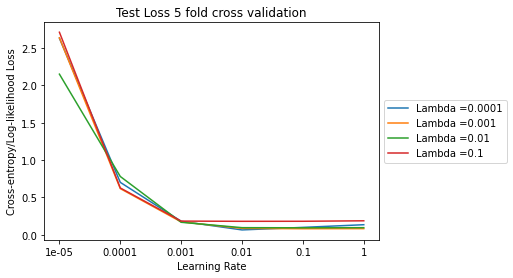

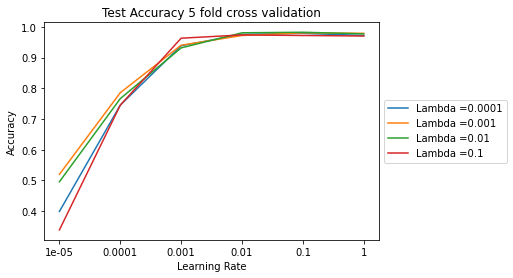

In [3]:
# Load the data
cancer = load_breast_cancer()
X, y =cancer.data,cancer.target

## Cross-validation based Logistic regression
ksplits = 5
kfold = KFold(n_splits = ksplits )
lr_eta = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
Lambdas = [1e-4, 1e-3, 1e-2, 1e-1]

est_test_acc = np.zeros((len(lr_eta), len(Lambdas) ))
est_test_loss = np.zeros((len(lr_eta), len(Lambdas) ))

for n_l, Lambda in  enumerate(Lambdas):
    for n_lr,lr in  enumerate(lr_eta):
        test_acc = np.zeros(ksplits)
        test_loss = np.zeros(ksplits)

        ## split the data into 5 folds and evaluate performance 
        for fold, (train_ind, test_ind) in enumerate(kfold.split(X)):
            X_train , X_test = X[train_ind], X[test_ind]
            y_train, y_test = y[train_ind], y[test_ind]

            ## Create design matrix with standard scaling
            X_train_scaled, X_test_scaled  = design_matrix(X_train, X_test)


            logreg = LogisticRegression(fit_intercept=False,
                      dimension= X_train_scaled.shape[1],
                      random_init=True,
                      reduction='mean',
                      l2_reg = True,
                      lbd= Lambda)

            logreg.simple_SGD( X_train_scaled, y_train, batch_size = 50, lr_eta = lr , n_epochs = 1000)     

            # find accuracy on test set with beta_opt
            y_pred_prob = np.zeros((len(y_test),2))
            y_pred_prob[:,1] = logreg.predict(X_test_scaled)
            y_pred_prob[:,0] = 1-logreg.predict(X_test_scaled)

            test_acc[fold] =  np.mean(np.argmax(y_pred_prob, axis=1)== y_test)
            test_loss[fold] = logreg.NLL_loss(X_test_scaled, y_test)
    
        est_test_acc[n_lr , n_l ] = np.mean(test_acc)
        est_test_loss[n_lr , n_l ] =  np.mean(test_loss)

print('Test Accuracy : \n', est_test_acc )
print('Test loss : \n', est_test_loss)

for n_l,Lambda in enumerate(Lambdas): 
    plt.plot(est_test_loss[:,n_l], label = 'Lambda ='+ str(Lambda))
    plt.xlabel('Learning Rate')
    plt.ylabel('Cross-entropy/Log-likelihood Loss')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test Loss 5 fold cross validation')
plt.show()

for n_l,Lambda in enumerate(Lambdas): 
    plt.plot(est_test_acc[:,n_l], label = 'Lambda ='+ str(Lambda))
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test Accuracy 5 fold cross validation')
plt.show()

### SGD implementation Frederik's

Test Accuracy : 
 [[0.71377115 0.65322155 0.51117839 0.49942556]
 [0.72229467 0.6956218  0.6574445  0.74673187]
 [0.94196553 0.94199658 0.94022667 0.97186772]
 [0.96481913 0.97012886 0.98244061 0.97014439]
 [0.97366868 0.97717746 0.98068623 0.96839   ]
 [0.97368421 0.97015991 0.96663562 0.95961807]]
Test loss : 
 [[1.17105614 1.22296953 1.91131046 2.1086232 ]
 [0.76646129 1.09835225 1.31634141 0.58482634]
 [0.14395686 0.15906856 0.14773217 0.17806111]
 [0.10517081 0.08718887 0.09447268 0.17982371]
 [0.10654123 0.080392   0.09341292 0.18117408]
 [0.13961078 0.08617313 0.10875903 0.19834604]]


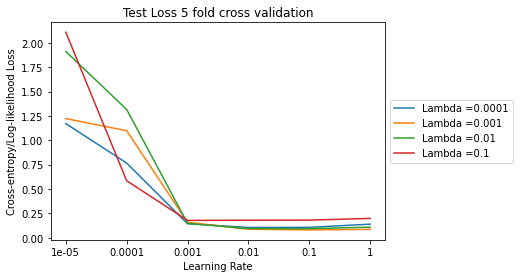

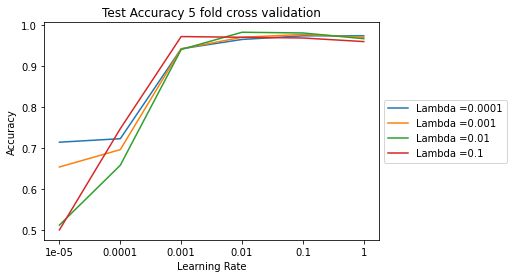

In [4]:
# Load the data
cancer = load_breast_cancer()
X, y =cancer.data,cancer.target

## Cross-validation based Logistic regression
ksplits = 5
kfold = KFold(n_splits = ksplits )
lr_eta = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
Lambdas = [1e-4, 1e-3, 1e-2, 1e-1]

est_test_acc = np.zeros((len(lr_eta), len(Lambdas) ))
est_test_loss = np.zeros((len(lr_eta), len(Lambdas) ))

for n_l, Lambda in  enumerate(Lambdas):
    for n_lr,lr in  enumerate(lr_eta):
        test_acc = np.zeros(ksplits)
        test_loss = np.zeros(ksplits)

        ## split the data into 5 folds and evaluate performance 
        for fold, (train_ind, test_ind) in enumerate(kfold.split(X)):
            X_train , X_test = X[train_ind], X[test_ind]
            y_train, y_test = y[train_ind], y[test_ind]

            ## Create design matrix with standard scaling
            X_train_scaled, X_test_scaled  = design_matrix(X_train, X_test)


            logreg = LogisticRegression(fit_intercept=False,
                      dimension= X_train_scaled.shape[1],
                      random_init=True,
                      reduction='mean',
                      l2_reg = True,
                      lbd= Lambda)
            
            optimizer = SGD(lr=lr)
            logreg.train( X_train_scaled, y_train, optimizer, batch_size = 50, epochs = 1000)     

            # find accuracy on test set with beta_opt
            y_pred_prob = np.zeros((len(y_test),2))
            y_pred_prob[:,1] = logreg.predict(X_test_scaled)
            y_pred_prob[:,0] = 1-logreg.predict(X_test_scaled)

            test_acc[fold] =  np.mean(np.argmax(y_pred_prob, axis=1)== y_test)
            test_loss[fold] = logreg.NLL_loss(X_test_scaled, y_test)
    
        est_test_acc[n_lr , n_l ] = np.mean(test_acc)
        est_test_loss[n_lr , n_l ] =  np.mean(test_loss)

print('Test Accuracy : \n', est_test_acc )
print('Test loss : \n', est_test_loss)

for n_l,Lambda in enumerate(Lambdas): 
    plt.plot(est_test_loss[:,n_l], label = 'Lambda ='+ str(Lambda))
    plt.xlabel('Learning Rate')
    plt.ylabel('Cross-entropy/Log-likelihood Loss')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test Loss 5 fold cross validation')
plt.show()

for n_l,Lambda in enumerate(Lambdas): 
    plt.plot(est_test_acc[:,n_l], label = 'Lambda ='+ str(Lambda))
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test Accuracy 5 fold cross validation')
plt.show()

# Part g) Scikit Learn's Logistic Regression

### Logistic Regression with SGD

Test Accuracy : 
 [[0.95575221 0.95575221 0.95575221 0.95575221]
 [0.97345133 0.97345133 0.97345133 0.97345133]
 [0.99115044 0.99115044 0.99115044 0.98230088]
 [0.99115044 0.99115044 0.99115044 0.98230088]
 [0.98230088 0.99115044 0.96460177 0.91150442]
 [0.95575221 0.92920354 0.98230088 0.91150442]]
Test loss : 
 [[0.33187613 0.33192234 0.33240489 0.3398067 ]
 [0.18367073 0.18386191 0.18673528 0.2111439 ]
 [0.11523603 0.11687057 0.1236756  0.17492136]
 [0.07752492 0.0792864  0.09730676 0.17141913]
 [0.06771612 0.06256053 0.09397474 0.23133687]
 [0.13818525 0.71363933 0.08972442 0.14565809]]


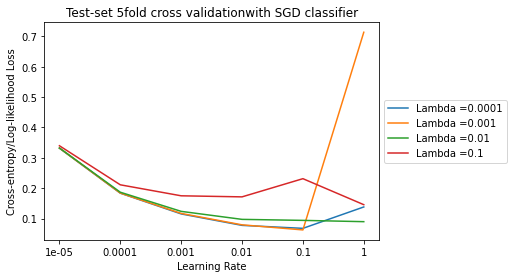

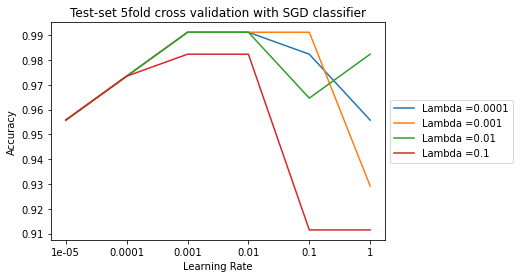

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Load the data
cancer = load_breast_cancer()

#now scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


est_test_loss_SGD = np.zeros((len(lr_eta), len(Lambdas) ))
est_test_acc_SGD = np.zeros((len(lr_eta), len(Lambdas) ))

# Logistic Regression
for n_lr,lr in enumerate(lr_eta):
    for n_l,Lambda in enumerate(Lambdas):  
        SGD_logistic = SGDClassifier(loss='log', penalty = 'l2', alpha=Lambda, fit_intercept= False, max_iter=1000,  learning_rate='constant', eta0= lr )  # with cross validation
        SGD_logistic.fit(X_train_scaled, y_train)
        est_test_acc_SGD[n_lr, n_l] = SGD_logistic.score(X_test_scaled,y_test)
        est_test_loss_SGD[n_lr, n_l] = log_loss(y_test, SGD_logistic.predict_proba(X_test_scaled))

print('Test Accuracy : \n', est_test_acc_SGD )
print('Test loss : \n', est_test_loss_SGD)

for n_l,Lambda in enumerate(Lambdas): 
    plt.plot(est_test_loss_SGD[:,n_l], label = 'Lambda ='+ str(Lambda))
    plt.xlabel('Learning Rate')
    plt.ylabel('Cross-entropy/Log-likelihood Loss')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test-set 5fold cross validationwith SGD classifier')
plt.show()

for n_l,Lambda in enumerate(Lambdas): 
    plt.plot(est_test_acc_SGD[:,n_l], label = 'Lambda ='+ str(Lambda))
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test-set 5fold cross validation with SGD classifier')
plt.show()